In [9]:
from large_gcs.graph.cost_factory import create_l2norm_edge_cost, create_l2norm_squared_edge_cost
from large_gcs.example_graphs.utils.spp_shape_gcs_utils import generate_spp_shape_gcs, load_spp_shape_gcs, SppShapeGcsGeneratorParams
from large_gcs.algorithms.gcs_dijkstra import GcsDijkstra
from large_gcs.algorithms.search_algorithm import AlgVisParams
import matplotlib.pyplot as plt
import os
import numpy as np
from IPython.display import Video

## Configure Params

In [10]:
# params = SppShapeGcsGeneratorParams(should_save=True,
#                                     random_seed = 804454)

# 1000 Vertex example
# workspace_radius=100
# params = SppShapeGcsGeneratorParams(
#     n_sets=1000,
#     workspace=([-workspace_radius, workspace_radius], [-workspace_radius, workspace_radius]),
#     source=(0,0),
#     target=(workspace_radius * 0.7, workspace_radius * 0.7),
#     set_scale=1.2,
#     k_nearest_edges=(1,4),
#     k_nearest_pool=20,
#     random_seed=490052,
#     should_save=True,
# )

# 100 Vertex example
workspace_radius=25
target_scaling_factor = 0.3
params = SppShapeGcsGeneratorParams(
    n_sets=100,
    samples_workspace=([-workspace_radius, workspace_radius], [-workspace_radius, workspace_radius]),
    source=(0,0),
    target=(workspace_radius * target_scaling_factor, workspace_radius * target_scaling_factor),
    set_scale=1.2,
    k_nearest_edges=(3,8),
    k_nearest_pool=10,
    random_seed=490052,
    should_save=True,
)

In [11]:
base_file_name = f"spp_{params.dim}d_v{params.n_sets}_shape_gcs"
graph_file = os.path.join(os.environ['PROJECT_ROOT'], "large_gcs", "example_graphs",
                    base_file_name + ".npy")
params.save_path = graph_file

## Generate the graph

Sampling points uniformly within the workspace...
Processing samples into convex sets...


100%|██████████| 100/100 [00:00<00:00, 144.90it/s]


Calculating distance matrix...
Adding edges to vertices...


100%|██████████| 3/3 [00:00<00:00, 22919.69it/s]


Saving graph data...
Adding vertices and edges to graph...
Adding points as vertices to the graph...


100%|██████████| 2/2 [00:00<00:00, 10713.42it/s]


Adding ellipsoids as vertices to the graph...


100%|██████████| 54/54 [00:00<00:00, 29422.24it/s]


Adding polyhedra as vertices to the graph...


100%|██████████| 46/46 [00:00<00:00, 71.02it/s]


Adding edges to the graph...


100%|██████████| 101/101 [00:00<00:00, 17723.40it/s]


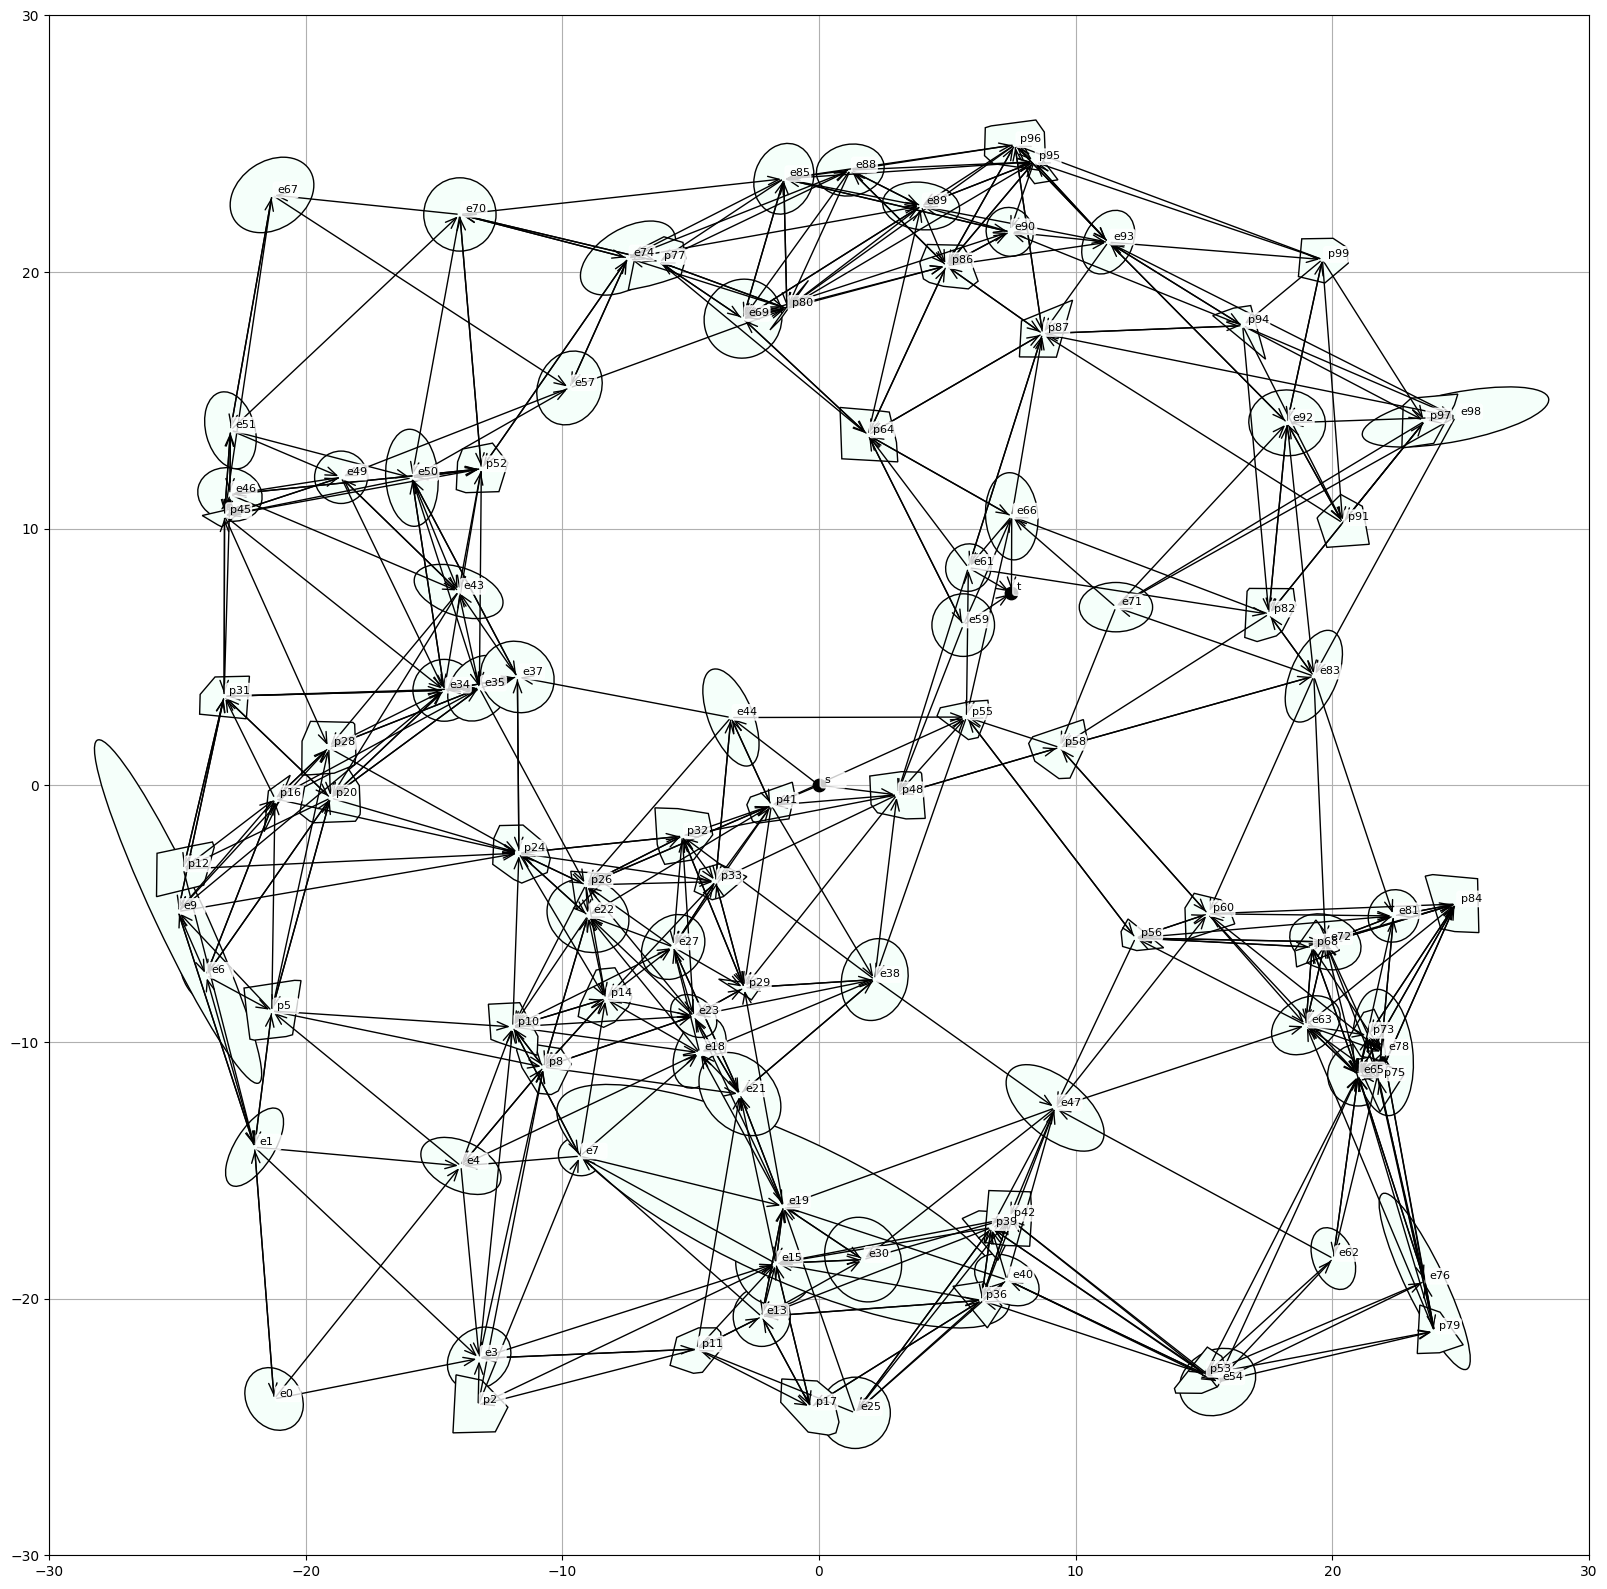

In [4]:
G = generate_spp_shape_gcs(params)

# draw convex sets and edges
plt.figure(figsize=(20,20))
G.plot_sets()
G.plot_edges()
G.plot_set_labels()
plt.grid()
plt.xlim(G.workspace[0])
plt.ylim(G.workspace[1])
plt.show()

## Standard GCS solve on entire graph

Adding points as vertices to the graph...


100%|██████████| 2/2 [00:00<00:00, 13273.11it/s]


Adding ellipsoids as vertices to the graph...


100%|██████████| 54/54 [00:00<00:00, 17804.61it/s]


Adding polyhedra as vertices to the graph...


100%|██████████| 46/46 [00:00<00:00, 68.47it/s]


Adding edges to the graph...


100%|██████████| 101/101 [00:00<00:00, 3624.91it/s]


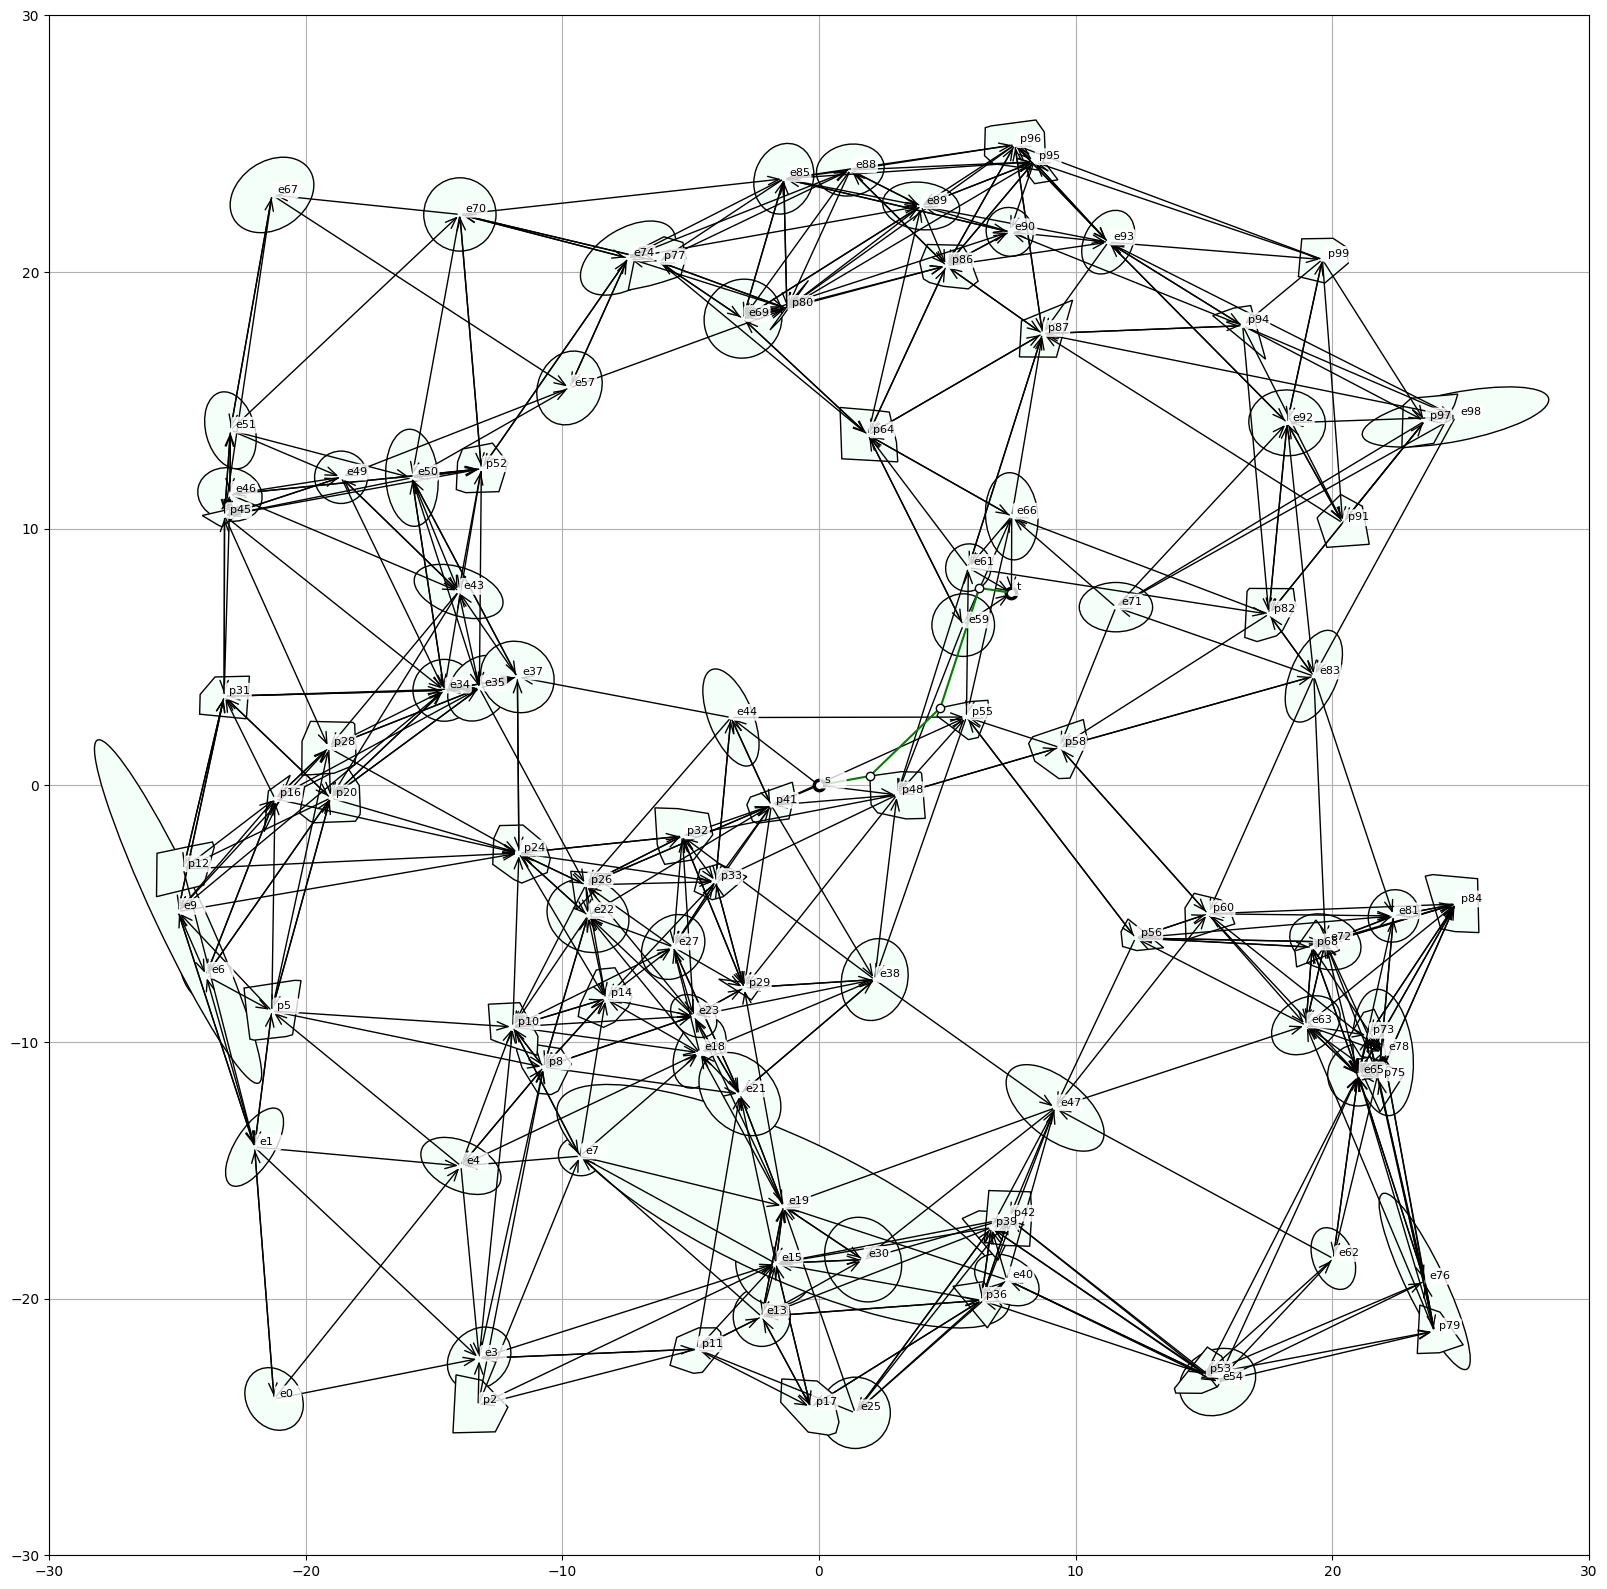

ShortestPathSolution(cost=12.010669463293986, time=1.9563514511100948, path=[('s', array([0., 0.])), ('p48', array([1.98, 0.36])), ('p55', array([4.73, 3.02])), ('e61', array([6.24974693, 7.6868738 ])), ('t', array([7.5, 7.5]))], flows=[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [5]:
G = load_spp_shape_gcs(graph_file, create_l2norm_edge_cost)
sol = G.solve_shortest_path()

# draw convex sets and edges
plt.figure(figsize=(20,20))
G.plot_sets()
G.plot_edges()
G.plot_set_labels()
G.plot_path(sol.path)
plt.grid()
plt.xlim(G.workspace[0])
plt.ylim(G.workspace[1])

plt.show()
print(sol)

## Verifying Params

In [6]:
data = np.load(graph_file, allow_pickle=True).item()
print(data["params"])

SppShapeGcsGeneratorParams(dim=2, n_sets=100, source=array([0, 0]), target=array([7.5, 7.5]), n_st_edges=3, samples_workspace=array([[-25,  25],
       [-25,  25]]), set_scale=1.2, k_nearest_edges=array([3, 8]), k_nearest_pool=10, n_polyhedron_vertices=array([ 4, 20]), random_seed=490052, save_path='/home/shaoyuan/Documents/Software/large_gcs/large_gcs/example_graphs/spp_2d_v100_shape_gcs.npy', should_save=True)


## Running GCS Dijkstra on the graph

Gcs Dijkstra complete! 
ShortestPathSolution(cost=12.010670067237244, time=0.06091362191364169, path=[('s', array([0., 0.])), ('p48', array([1.97999999, 0.35999998])), ('p55', array([4.73      , 3.01999998])), ('e61', array([6.24974953, 7.68687541])), ('t', array([7.5, 7.5]))], flows=[1.6773330116185173e-08, 0.9999999811998408, 2.5309311767012297e-09, 1.503120460619611e-09, 5.40605258106356e-09, 2.2974482982947825e-09, 1.9427223090659707e-08, 4.201924706254331e-09, 0.9999999708777764, 6.851010883451294e-09, 2.0143176801825833e-09, 1.109842009024876e-09, 1.3955293216621348e-09, 2.498893981888401e-09, 7.083815209954713e-09, 1.6215824632770053e-09, 1.7801458984834938e-09, 2.010584027088346e-09, 0.0, 3.734159996748706e-09, 1.691153236593632e-09, 2.3673605818290813e-09, 3.490910880045276e-09, 2.2912577160999636e-10, 1.8649661233928493e-09, 7.023040678024959e-10, 4.88167266096497e-09, 0.0, 4.88167266096497e-09, 3.9292346026327284e-09, 7.489791557538787e-09, 3.7158475454020138e-09, 1.33966121

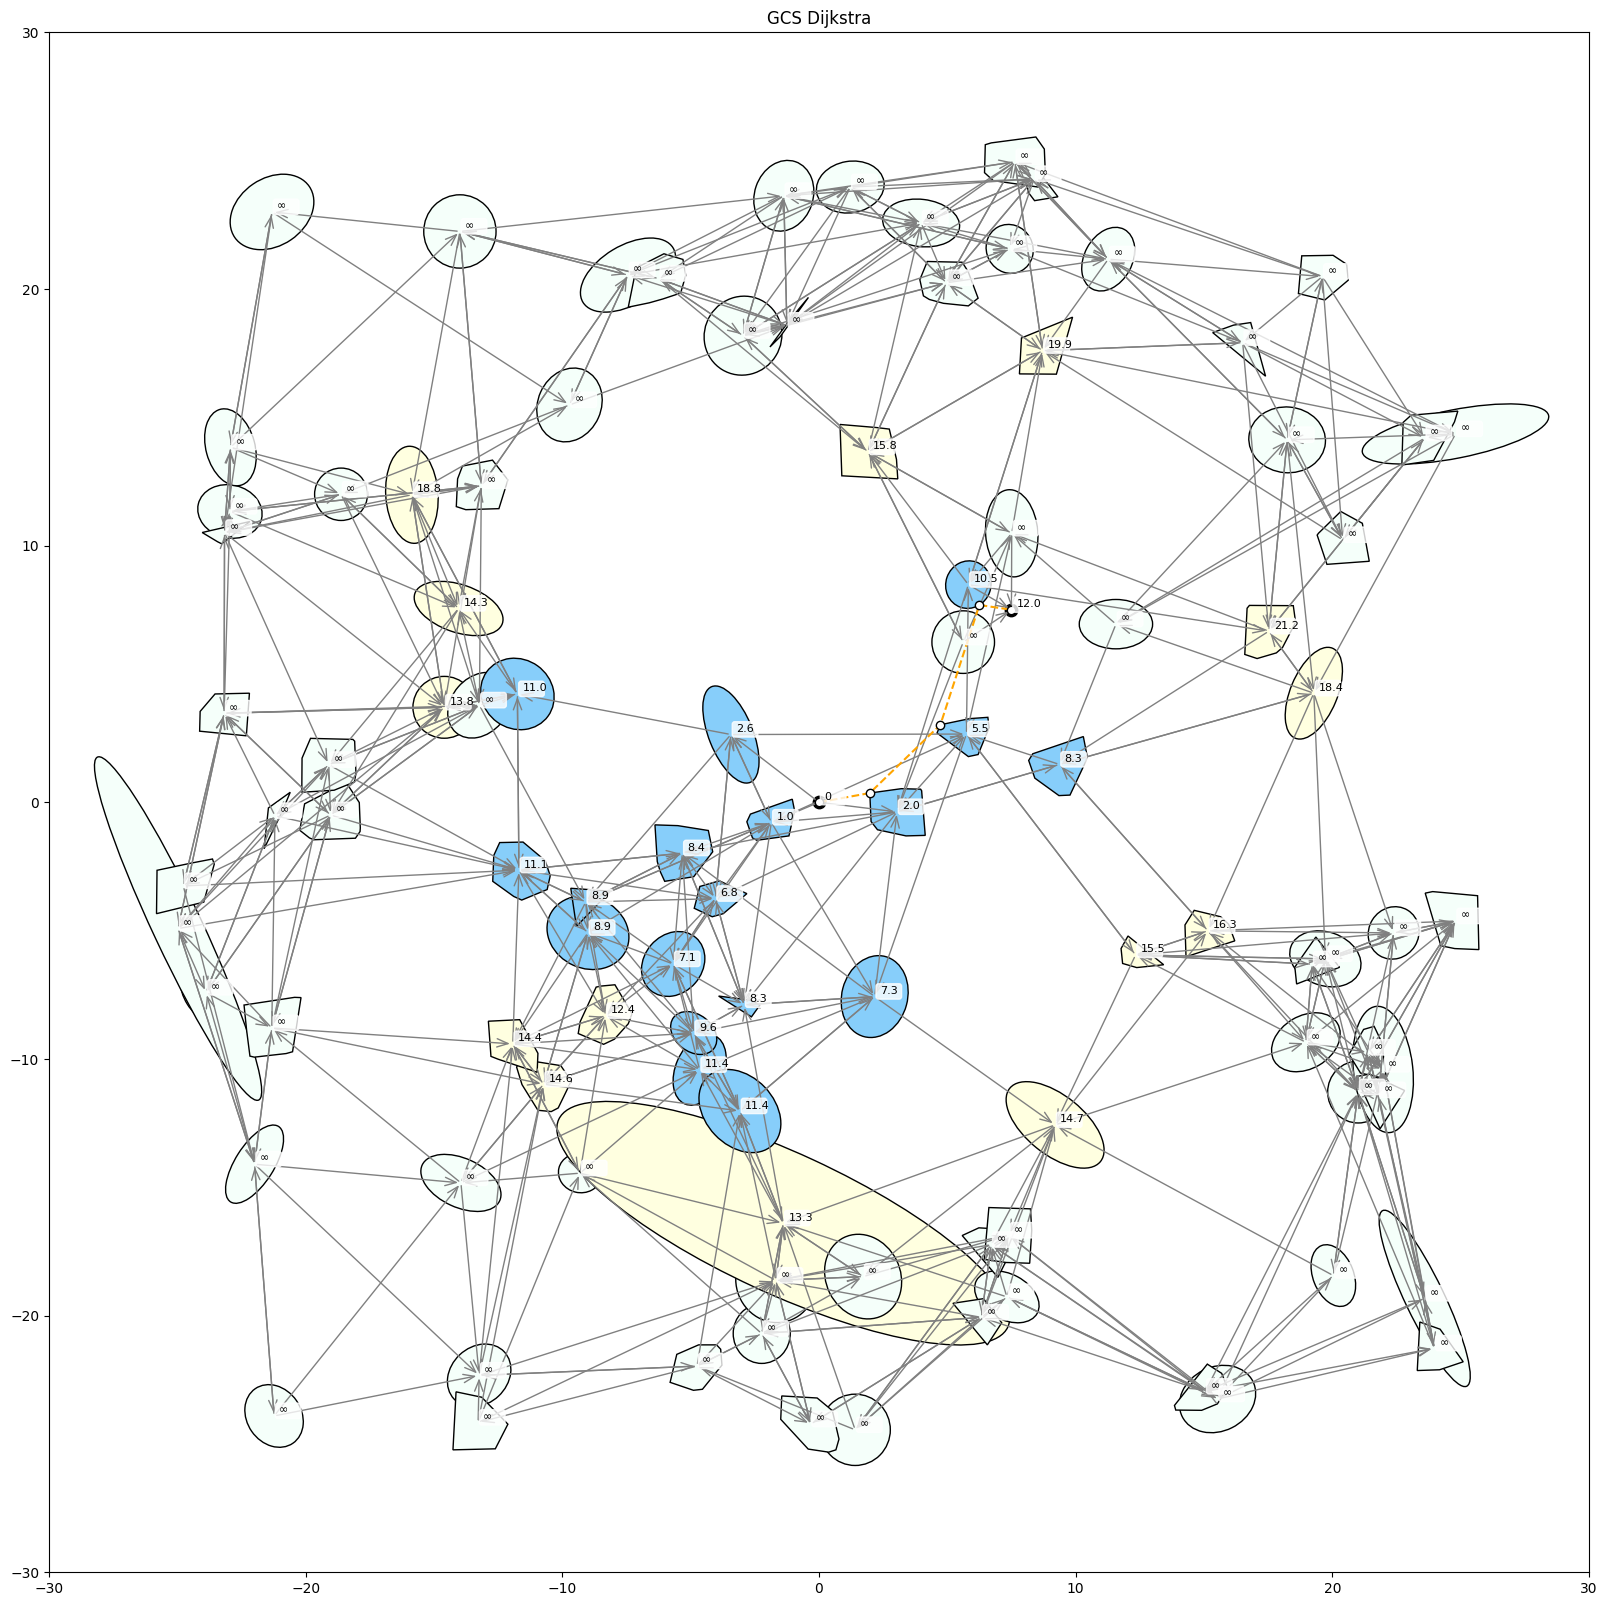

In [7]:
vid_file = os.path.join(os.environ['PROJECT_ROOT'], "output", "gcs_dijkstra", base_file_name + ".mp4")
vis_params = AlgVisParams(output_path=vid_file,
                          fps=10,
                          figsize=(20,20),
                        )
gcs_dijk = GcsDijkstra(G, vis_params).run(animate=True)

In [8]:
Video(vid_file)